# Bank Customer Occupation, Duration and Churn


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Datasource: [Bank Customer Churn Data](https://www.kaggle.com/datasets/pentakrishnakishore/bank-customer-churn-data/data)

Preface: In my research I am going to look at customers who have churned, their known occupations and their longevity with the establishment. Does occupation play a role in a person's duration with a bank? I am hopeful that this study will benefit bank owners, and potentially create opportunities for additional research.

In the Bank Customer Churn Data dataset (hyperlink provided above), the occupations are as follows: company, retired, salaried, self-employed, and student. To prepare the data, I will use the following categories; self-employed vs salaried vs other. I will be combine company, retired and student into a single group called other. Additionally, I will filter to only customers who churned, where the churn field has values equal to 1. Moreover, I will be using the vintage field to gauge customer duration. I will then remove any null values, within any of the aforementioned fields.

## Hypothesis: Given the customer's occupation, is there a difference in the duration of the relationship with the bank, for customers who churned?



In [ ]:
# Upload CSV file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving churn_prediction.csv to churn_prediction (1).csv


In [ ]:
# Loading dataset

In [ ]:
bank = pd.read_csv('churn_prediction.csv')

In [ ]:
# Data Exploration
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [ ]:
# Evaluating how many unique occupations and the count for each
bank.groupby('occupation').agg({'occupation':'count'})

,occupation
occupation,
company,40
retired,2024
salaried,6704
self_employed,17476
student,2058


In [ ]:
#Creating a subset with minical data
bank_occ = bank[['customer_id', 'vintage', 'age', 'occupation', 'churn', 'current_month_credit']]

In [ ]:
# Viewing subset data info
bank_occ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           28382 non-null  int64  
 1   vintage               28382 non-null  int64  
 2   age                   28382 non-null  int64  
 3   occupation            28302 non-null  object 
 4   churn                 28382 non-null  int64  
 5   current_month_credit  28382 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.3+ MB


In [ ]:
# Deleting duplicates in subset dataset & viewing changes

In [ ]:
bank_occ.dropna(inplace=True)

<ipython-input-126-9d07c29ce844>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_occ.dropna(inplace=True)


In [ ]:
bank_occ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28302 entries, 0 to 28381
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           28302 non-null  int64  
 1   vintage               28302 non-null  int64  
 2   age                   28302 non-null  int64  
 3   occupation            28302 non-null  object 
 4   churn                 28302 non-null  int64  
 5   current_month_credit  28302 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.5+ MB


In [ ]:
# Creating a dataset for each Occupation group

In [ ]:
self_employed = bank_occ[((bank_occ['occupation'] == 'self_employed')) & ((bank_occ['churn'] == 1))]
salaried = bank_occ[((bank_occ['occupation'] == 'salaried')) & ((bank_occ['churn'] == 1))]
other = bank_occ[((bank_occ['occupation'].isin(['company', 'retired', 'student']))) & ((bank_occ['churn'] == 1))]

In [ ]:
# Confirming that totals tie out

In [ ]:
print('self-employed: ', len(self_employed))
print('salaried: ', len(salaried))
print('Other(company,retired,student): ', len(other))

print('summed total: ', len(self_employed)+len(salaried)+len(other))
print('')
print(len(bank_occ[bank_occ['churn'] == 1]), 'dataset total')


self-employed:  3467
salaried:  1147
Other(company,retired,student):  633
summed total:  5247

5247 dataset total


### Visualizing the data

In [ ]:
# Salaried Cusotmer Distribution

[Text(0.5, 0, 'Duration'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Customer Occupation: Salaried Customer')]

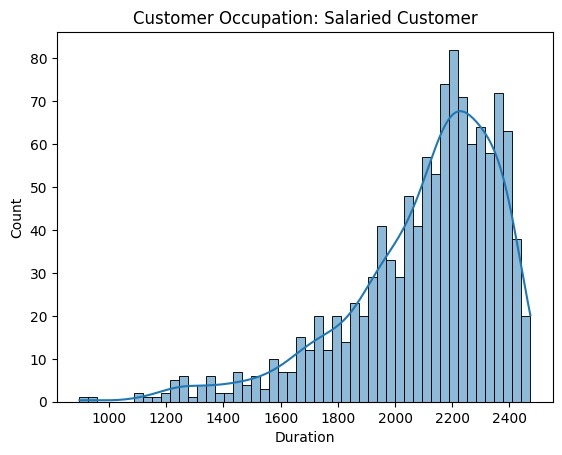

In [ ]:
ax = sns.histplot(salaried['vintage'], bins=50, kde=True)
ax.set(xlabel ="Duration", ylabel = "Count", title ='Customer Occupation: Salaried Customer')

In [ ]:
# Self-Employed Distribution

[Text(0.5, 0, 'Duration'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Customer Occupation: Self-Employed Customer')]

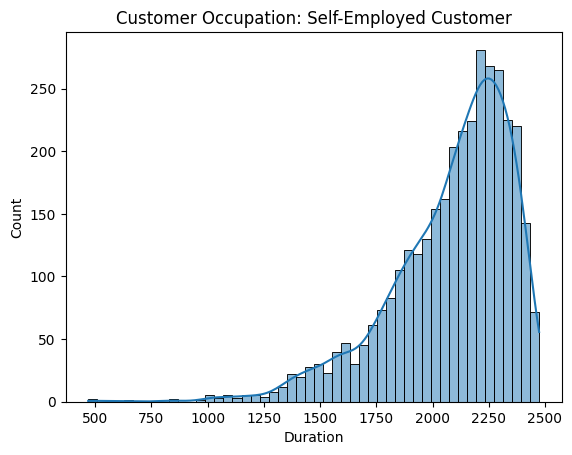

In [ ]:
ax = sns.histplot(self_employed['vintage'], bins=50, kde=True)
ax.set(xlabel ="Duration", ylabel = "Count", title ='Customer Occupation: Self-Employed Customer')

In [ ]:
# Other Distribution

[Text(0.5, 0, 'Duration'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Customer Occupation: Other(Company/Retired/Students)')]

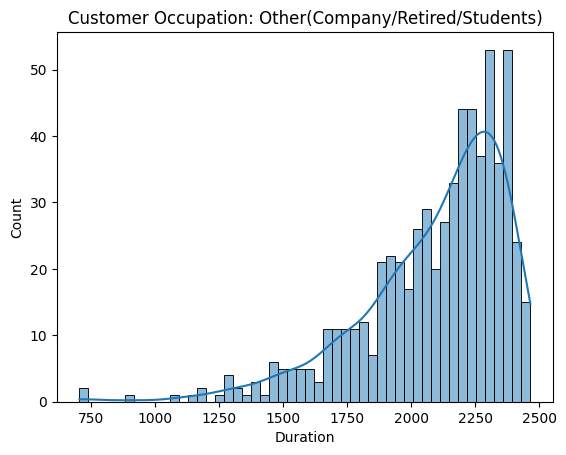

In [ ]:
ax = sns.histplot(other['vintage'], bins=50, kde=True)
ax.set(xlabel ="Duration", ylabel = "Count", title ='Customer Occupation: Other(Company/Retired/Students)')

In [ ]:
# Distribution Overlay and Stats for each Sample
# Review Skewness and Kurtosis

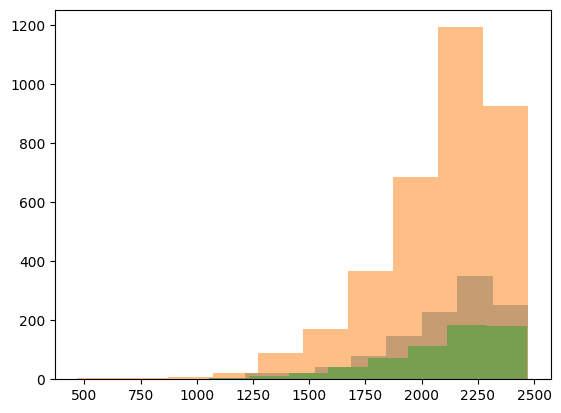

DescribeResult(nobs=1147, minmax=(897, 2473), mean=2103.5858761987793, variance=71169.37721744714, skewness=-1.291332383970739, kurtosis=1.7575846493546239)
DescribeResult(nobs=3467, minmax=(469, 2474), mean=2082.575713873666, variance=74110.3078116296, skewness=-1.2877607468841303, kurtosis=2.240429793867575)
DescribeResult(nobs=633, minmax=(703, 2466), mean=2093.6729857819905, variance=80258.74574059632, skewness=-1.380190236217246, kurtosis=2.412474433172366)


In [ ]:
plt.hist(salaried['vintage'], alpha = .5)
plt.hist(self_employed['vintage'], alpha = .5)
plt.hist(other['vintage'], alpha = .5)
plt.show()

print(stats.describe(salaried['vintage']))
print(stats.describe(self_employed['vintage']))
print(stats.describe(other['vintage']))

<Axes: >

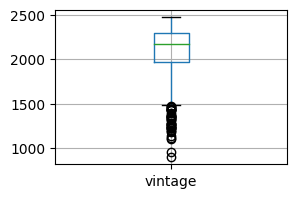

In [ ]:
# Salaried Customer Occupation
salaried.boxplot('vintage', figsize=(3, 2))

<Axes: >

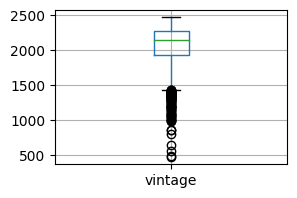

In [ ]:
# Self-Employed Customer Occupation
self_employed.boxplot('vintage', figsize=(3, 2))

<Axes: >

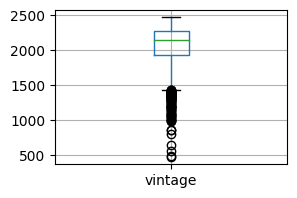

In [ ]:
# Other Customer Occupation
self_employed.boxplot('vintage', figsize=(3, 2))

### Based on some visual cues and results, each group is seemingly normally distributed, as the skewness and kurtosis are contained below +/- 3 digits.

### The boxplot seems to show some outliers, while the mean and median are similar in range.

### Next Step: I will run a Shapiro-Wilk test to confirm normality.

In [ ]:
# Shapiro-Wilk test

In [ ]:
print(stats.shapiro(salaried['vintage']))
print(stats.shapiro(other['vintage']))

ShapiroResult(statistic=0.8990746736526489, pvalue=8.352762791039308e-27)
ShapiroResult(statistic=0.8897504210472107, pvalue=7.395291944256704e-21)


### Each p-value is far below 0.05. Although the W values are close to 1, the p-value does not meet the p-value > 0.05 threshold.

##### NOTE: I've ommited testing the 'self-employed' group since the sample size is greater than 2,000 (at 3,467) and would be hyper-sensative, to any small difference

### Therefore, we can assume the distribution is NOT normal. Moreover, we will skip the one way ANOVA test since the data seems to be Nonparametric.

### Nonparametric Test

In [ ]:
# Kruskal-Wallis test

In [ ]:
stats.kruskal(salaried['vintage'], self_employed['vintage'], other['vintage'])

KruskalResult(statistic=8.11693400659162, pvalue=0.01727548208343954)

### The p-value is below < 0.05 threhsold at a p-value of 0.02. Based on the Krustal-Wallis test, we can reject the Null Hypothesis

In [ ]:
# Salaried vs Self-Employed

In [ ]:
stats.kruskal(salaried['vintage'], self_employed['vintage'])

KruskalResult(statistic=6.602179424664815, pvalue=0.010185401915074638)

In [ ]:
# Self-Employed vs Other

In [ ]:
stats.kruskal(self_employed['vintage'], other['vintage'])

KruskalResult(statistic=2.934540360733683, pvalue=0.0867033382979139)

In [ ]:
# Salaried vs Other

In [ ]:
stats.kruskal(salaried['vintage'], other['vintage'])

KruskalResult(statistic=0.053877339105701735, pvalue=0.8164487517776675)

# Results

#### It appears that we can reject the H0: Null Hypothesis, that there is no difference in customer duration of the relationship with the bank, for churned churned customers. We can say with 95% confidence that any difference was not due to chance.

#### Additionally, although we rejected the Null Hypothessis, the p-value was somewhat high, at 0.02.

#### Moreover, between Salaried and Self-employed customers, the p-value was significant at 0.01. However, when other groups were compared, the p-value was above 0.05, which suggests that the true difference lies between Salaried and Self-Employed customers.

#### Recomendation: Futher studies should be done to speficically test Salaried vs Self-Employed customers and assess for any additional differences between groups, as this can maybe help bank owners look to cater to customers differently, based on their occupations and perhaps reduce churn. Moveover, perhaps a bias in this study was combinining company, retired and students, into one group and it may be that these categories should be looked at seperately.